In [ ]:
!pip install statsmodels==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 37.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import warnings
import itertools
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("banjir-clean.csv")
df.head()

,date,time,source,status,disaster_type,report_dat,tags,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }","{ ""district_id"": ""3174"", ""local_area_id"": ""220...",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.73835,-6.19933


In [ ]:
import json
result = []
lst_data = list(df['report_dat'])
for i in lst_data:
  conv = str(i)
  proses = json.loads(conv)
  result.append(proses)

In [ ]:
result

[{'report_type': 'flood', 'flood_depth': 30},
 {'points': 1, 'flood_depth': 80, 'report_type': 'flood'},
 {'points': 1, 'flood_depth': 51, 'report_type': 'flood'},
 {'points': 2, 'flood_depth': 100, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 60},
 {'report_type': 'flood', 'flood_depth': 39},
 {'report_type': 'flood', 'flood_depth': 79},
 {'report_type': 'flood', 'flood_depth': 116},
 {'report_type': 'flood', 'flood_depth': 60},
 {'points': 1},
 {'report_type': 'flood', 'flood_depth': 81},
 {'report_type': 'flood', 'flood_depth': 69},
 {'points': 1, 'flood_depth': 195, 'report_type': 'flood'},
 {'points': 1, 'flood_depth': 100, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 44},
 {'points': 1, 'flood_depth': 93, 'report_type': 'flood'},
 {'points': -1, 'flood_depth': 101, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 190},
 {'report_type': 'flood', 'flood_depth': 50},
 {'report_type': 'flood', 'flood_depth': 50},
 {'report_ty

In [ ]:
y = pd.DataFrame(result)
y

,report_type,flood_depth,points,structureFailure,accessabilityFailure,condition,impact,fireDistance,fireLocation,personLocation,fireRadius,volcanicSigns,evacuationNumber,evacuationArea,visibility,airQuality
0,flood,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,flood,80.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,flood,51.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,flood,100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,flood,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,flood,68.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3039,flood,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3040,flood,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3041,flood,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y = y[['report_type', 'flood_depth']]
y

,report_type,flood_depth
0,flood,30.0
1,flood,80.0
2,flood,51.0
3,flood,100.0
4,flood,60.0
...,...,...
3038,flood,68.0
3039,flood,103.0
3040,flood,54.0
3041,flood,19.0


In [ ]:
z = pd.concat([df, y], axis=1, join='inner')
z

,date,time,source,status,disaster_type,report_dat,tags,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,report_type,flood_depth
0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.768660,-6.169780,flood,30.0
1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.978700,-6.179440,flood,80.0
2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.891000,-6.234490,flood,51.0
3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.161890,-6.301700,flood,100.0
4,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }","{ ""district_id"": ""3174"", ""local_area_id"": ""220...",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.738350,-6.199330,flood,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,28/12/2021,00:18:56,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Laporan awal. Air sungai meluap akibat curah h...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.655871,1.343771,flood,68.0
3039,28/12/2021,01:23:43,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }","{ ""district_id"": null, ""local_area_id"": null, ...",Luapan air sungai Karangan masuk ke pemukiman ...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.665504,1.351043,flood,103.0
3040,28/12/2021,08:00:14,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }","{ ""district_id"": ""3173"", ""local_area_id"": ""678...",banjir lah pokoknya,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.827622,-6.157398,flood,54.0
3041,28/12/2021,10:49:49,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }","{ ""district_id"": null, ""local_area_id"": null, ...",saluran irigasi yg di kelola desa dengan buruk...,Purwajaya,Purwadadi,Ciamis,Jawa Barat,108.695570,-7.460077,flood,19.0


In [ ]:
z = z[z['report_type'].notna() & z['flood_depth'].notna() & z['date'].notna()]
z

,date,time,source,status,disaster_type,report_dat,tags,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,report_type,flood_depth
0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.768660,-6.169780,flood,30.0
1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.978700,-6.179440,flood,80.0
2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.891000,-6.234490,flood,51.0
3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.161890,-6.301700,flood,100.0
4,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }","{ ""district_id"": ""3174"", ""local_area_id"": ""220...",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.738350,-6.199330,flood,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,28/12/2021,00:18:56,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Laporan awal. Air sungai meluap akibat curah h...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.655871,1.343771,flood,68.0
3039,28/12/2021,01:23:43,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }","{ ""district_id"": null, ""local_area_id"": null, ...",Luapan air sungai Karangan masuk ke pemukiman ...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.665504,1.351043,flood,103.0
3040,28/12/2021,08:00:14,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }","{ ""district_id"": ""3173"", ""local_area_id"": ""678...",banjir lah pokoknya,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.827622,-6.157398,flood,54.0
3041,28/12/2021,10:49:49,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }","{ ""district_id"": null, ""local_area_id"": null, ...",saluran irigasi yg di kelola desa dengan buruk...,Purwajaya,Purwadadi,Ciamis,Jawa Barat,108.695570,-7.460077,flood,19.0


In [ ]:
z = z[['date', 'disaster_type', 'flood_depth']]
z = z [['date', 'flood_depth']]

In [ ]:
z.columns = ['ds', 'y']
z

,ds,y
0,01/01/2020,30.0
1,01/01/2020,80.0
2,01/01/2020,51.0
3,01/01/2020,100.0
4,01/01/2020,60.0
...,...,...
3038,28/12/2021,68.0
3039,28/12/2021,103.0
3040,28/12/2021,54.0
3041,28/12/2021,19.0


In [ ]:
#z['ds'] = pd.to_datetime(z['ds'])
#z

In [ ]:
z['ds'] = pd.to_datetime(z['ds'])
z = z.set_index('ds') 
grouped_dat = z.y.resample('m').mean()


In [ ]:
grouped_dat

ds
2020-01-31    59.302083
2020-02-29    56.142319
2020-03-31    59.850746
2020-04-30    62.052632
2020-05-31    47.113208
2020-06-30    73.678571
2020-07-31    66.098765
2020-08-31    45.455696
2020-09-30    46.266667
2020-10-31    65.000000
2020-11-30    67.000000
2020-12-31    54.535714
2021-01-31    71.939759
2021-02-28    68.268722
2021-03-31    74.923077
2021-04-30    67.657895
2021-05-31    59.781250
2021-06-30    52.326531
2021-07-31    48.323077
2021-08-31    66.450980
2021-09-30    69.868852
2021-10-31    63.321429
2021-11-30    56.942857
2021-12-31    59.909091
Freq: M, Name: y, dtype: float64

In [ ]:
final_dat = grouped_dat.to_frame()

In [ ]:
final_dat

,y
ds,
2020-01-31,59.302083
2020-02-29,56.142319
2020-03-31,59.850746
2020-04-30,62.052632
2020-05-31,47.113208
2020-06-30,73.678571
2020-07-31,66.098765
2020-08-31,45.455696
2020-09-30,46.266667


In [ ]:
final_dat['ds'] = final_dat.index

In [ ]:
final_dat

,y,ds
ds,,
2020-01-31,59.302083,2020-01-31
2020-02-29,56.142319,2020-02-29
2020-03-31,59.850746,2020-03-31
2020-04-30,62.052632,2020-04-30
2020-05-31,47.113208,2020-05-31
2020-06-30,73.678571,2020-06-30
2020-07-31,66.098765,2020-07-31
2020-08-31,45.455696,2020-08-31
2020-09-30,46.266667,2020-09-30


In [ ]:
final_dat = final_dat.drop('ds', axis=1)

<AxesSubplot:xlabel='ds'>

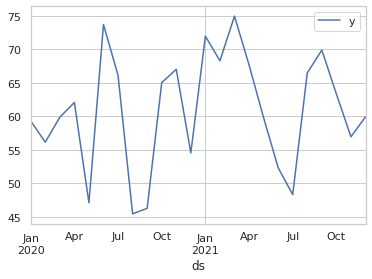

In [ ]:
final_dat.plot()
#plt.xlabel('Month', fontsize=18)

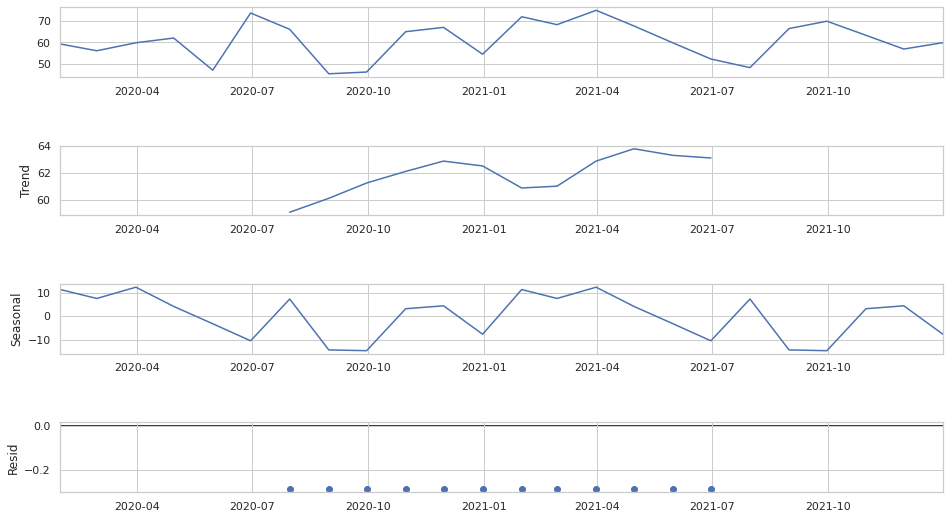

In [ ]:
decomposition = seasonal_decompose(final_dat, model='additive')
fig = decomposition.plot()
fig.set_size_inches(15, 8)

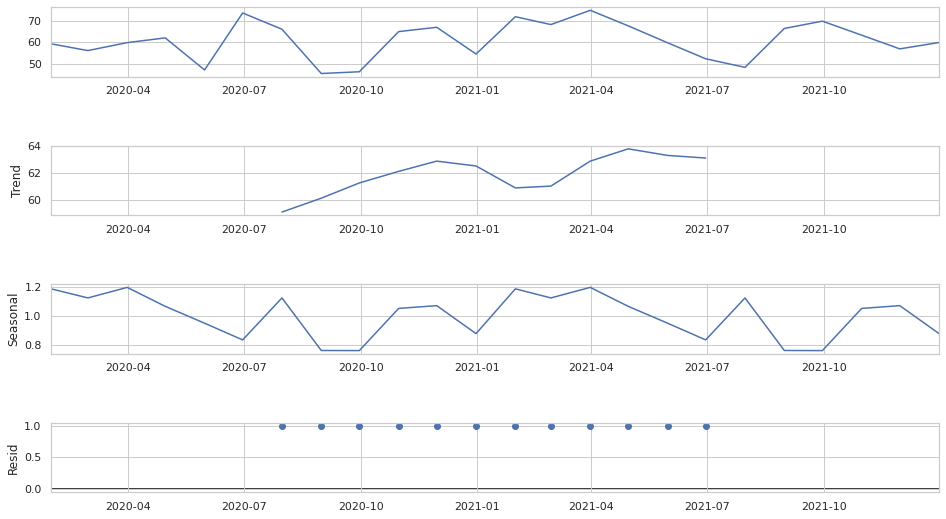

In [ ]:
decomposition = seasonal_decompose(final_dat, model='multiplicative')  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [ ]:
result = adfuller(final_dat['y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.9146904175093797
p-value: 0.0019293546986776221
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 97.7 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(final_dat['y'], trace = True, supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=179.767, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=174.920, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=176.347, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=175.620, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.837, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.773 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:                        SARIMAX   Log Likelihood                 -85.460
Date:                Sat, 20 Aug 2022   AIC                            174.920
Time:                        15:37:56   BIC                            177.276
Sample:                    01-31-2020   HQIC                           175.545
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     60.9254      1.811     33.651      0.000      57.377      64.474
sigma2        72.5152     29.170      2.486      0.013      15.343     129.688
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.41   Prob(JB):                         0.57
Heteroskedasticity (H):               0.57   Skew:                            -0.30
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# fit model
# order (p, d, q)
model = ARIMA(final_dat, order=(0,0,0)) # AR(p), I(d), MA(q)
results = model.fit()

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                          ARIMA   Log Likelihood                 -85.460
Date:                Sat, 20 Aug 2022   AIC                            174.920
Time:                        15:37:56   BIC                            177.276
Sample:                    01-31-2020   HQIC                           175.545
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.9254      1.810     33.651      0.000      57.377      64.474
sigma2        72.5147     29.170      2.486      0.013      15.343     129.686
Ljung-Box (L1) (Q):                   0.67   Jarque-

<AxesSubplot:xlabel='ds'>

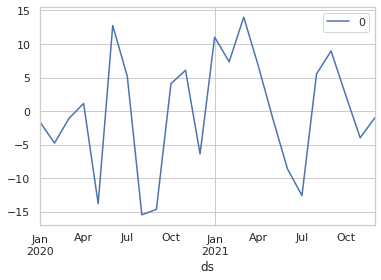

In [ ]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

In [ ]:
# Define the p, d and q parameters 
# In our example, we only take values between 0 and 2 to make the computation faster
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
mod = smf.tsa.statespace.SARIMAX(final_dat,
                                order=(0, 0, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30898D+00    |proj g|=  4.79060D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   2.141D-08   5.309D+00
  F =   5.3089730578440948     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3796.0643   5782.737    

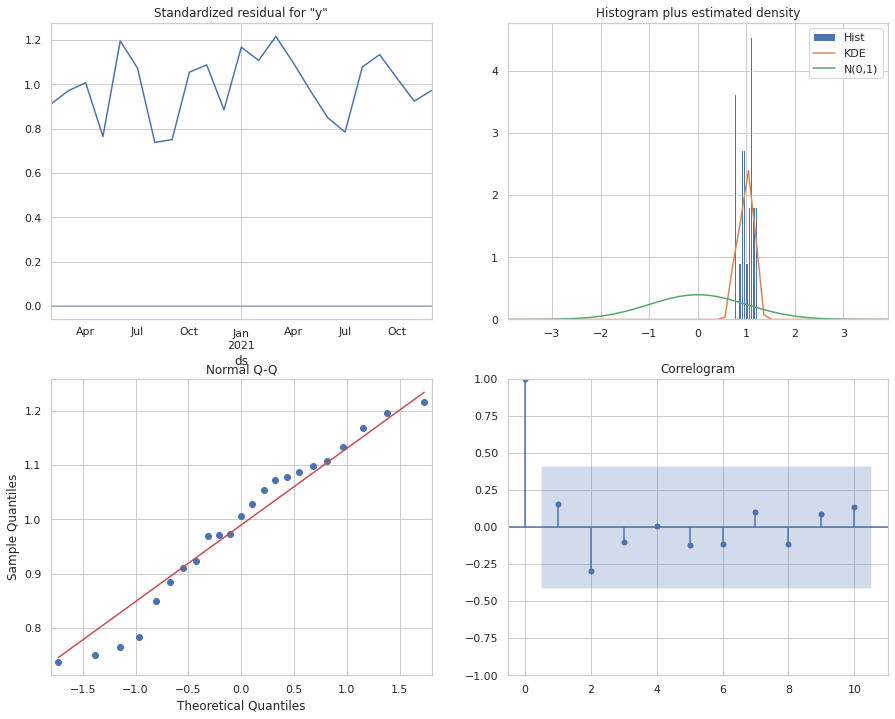

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-31'), dynamic=False)
pred_ci = pred.conf_int()

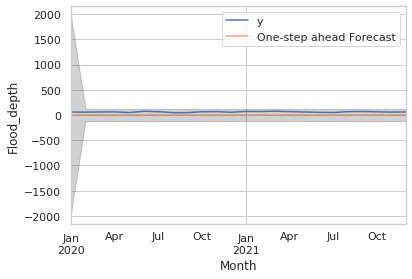

In [ ]:
ax = final_dat['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Month')
ax.set_ylabel('Flood_depth')
plt.legend()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b45e9aae-8ad1-48af-8ea6-40d8450c824a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>